### Imports

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from scipy import sparse
import matplotlib.pyplot as plt
import pickle 
import numpy as np
import time
from sklearn.linear_model import SGDClassifier
import itertools
from sklearn.tree import export_graphviz

### Read data from file

In [2]:
fake_data = pd.read_csv('tweets_cred.csv',
            low_memory=True,
            encoding = 'utf-8'
           )

In [3]:
fake_data

,lang,contributors,followrequestsent,defaultprofileimage,inreplytouserid,tweetid,symbols,linkcolor,timezone,lang1,...,statusescount,imageurlhttps,protected,place,inreplytoscreenname,urls,following,creationdate,defaultprofile,istranslator
0,ar,NaN,NaN,False,NaN,464712293247250433,NaN,0084B4,NaN,ar,...,7362,https://pbs.twimg.com/profile_images/457099868...,NaN,NaN,NaN,NaN,NaN,Fri May 09 10:23:39 +0000 2014,True,False
1,ar,NaN,NaN,False,NaN,464712355503689729,NaN,0084B4,Casablanca,ar,...,11321,https://pbs.twimg.com/profile_images/415805141...,NaN,NaN,NaN,NaN,NaN,Fri May 09 10:23:54 +0000 2014,True,False
2,ar,NaN,NaN,False,NaN,464714284434345985,NaN,0E2CF0,Athens,en-gb,...,88632,https://pbs.twimg.com/profile_images/439357776...,NaN,NaN,NaN,http://t.co/Vp2614ez0s,NaN,Fri May 09 10:31:34 +0000 2014,False,False
3,ar,NaN,NaN,False,NaN,464714301601632256,NaN,0084B4,Athens,en,...,315468,https://pbs.twimg.com/profile_images/339930515...,NaN,NaN,NaN,http://t.co/XhoKHFFyqC,NaN,Fri May 09 10:31:38 +0000 2014,False,False
4,ar,NaN,NaN,False,NaN,464714305011593218,NaN,0084B4,Athens,en,...,315471,https://pbs.twimg.com/profile_images/339930515...,NaN,NaN,NaN,http://t.co/lKPnwWkZi9,NaN,Fri May 09 10:31:38 +0000 2014,False,False
5,ar,NaN,NaN,False,NaN,464716298187190272,NaN,0084B4,Riyadh,ar,...,585481,https://pbs.twimg.com/profile_images/378800000...,NaN,NaN,NaN,http://t.co/lt94ICkVky,NaN,Fri May 09 10:39:34 +0000 2014,False,False
6,ar,NaN,NaN,False,NaN,464716309951836162,NaN,0084B4,NaN,ar,...,30387,https://pbs.twimg.com/profile_images/349353387...,NaN,NaN,NaN,NaN,NaN,Fri May 09 10:39:36 +0000 2014,True,False
7,ar,NaN,NaN,False,NaN,464717270271680513,NaN,0084B4,NaN,en,...,199580,https://pbs.twimg.com/profile_images/178033637...,NaN,NaN,NaN,NaN,NaN,Fri May 09 10:43:25 +0000 2014,True,False
8,ar,NaN,NaN,False,NaN,464718414880071680,NaN,0084B4,NaN,ar,...,684,https://pbs.twimg.com/profile_images/459702593...,NaN,NaN,NaN,NaN,NaN,Fri May 09 10:47:58 +0000 2014,True,False
9,ar,NaN,NaN,False,NaN,464718444693553152,NaN,0084B4,Athens,ar,...,54859,https://pbs.twimg.com/profile_images/214885327...,NaN,NaN,NaN,NaN,NaN,Fri May 09 10:48:05 +0000 2014,True,False


### Displaying a sample of the dataset

In [ ]:
fake_data.head()

### Displaying the columns of Dataframe

In [40]:
len(fake_data.columns)

63

### Counts

In [39]:
fake_data.count()

lang                    8948
contributors               0
followrequestsent          0
defaultprofileimage     8948
inreplytouserid          318
tweetid                 8948
symbols                    0
linkcolor               8948
timezone                6168
lang1                   8948
creationdate1           8948
textcolor               8948
favoritecount           8948
screenname              8948
retweetcount            8948
verified                8948
expandedurls            5918
usermentions             321
retweeted               8948
coordinates               41
geo                       41
source                  8948
location                4709
text                    8948
geoenabled              8948
cred                    8948
sidebarbordercolor      8948
isquotestatus           6009
favorited               8948
backgroundimagehttps    7881
                        ... 
timestamp               6009
imageurl                8948
displayurls             5918
backgroundtile

### EDA

In [34]:
grouped = fake_data.cred.groupby(fake_data['cred']).count()

In [36]:
grouped

cred
False    3536
True     5412
Name: cred, dtype: int64

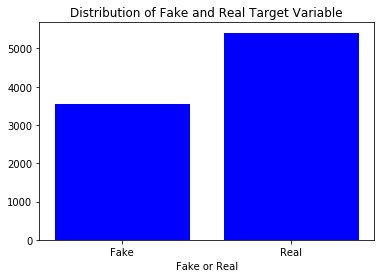

In [41]:

x_pos   = np.arange(2)
objects = ["Fake", "Real"]
values  = [grouped[0], grouped[1]]
plt.bar(x_pos, values, color='b')
plt.xticks(x_pos, objects)
plt.xlabel('Fake or Real')
plt.title('Distribution of Fake and Real Target Variable')
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
fake_data.where(fake_data['cred'] == False).groupby(fake_data['verified']).count()

In [ ]:
fake_data.where(fake_data['cred'] == True).groupby(fake_data['verified']).count()

In [ ]:
fake_data.where(fake_data['cred'] == False).groupby(fake_data['defaultprofile'])['defaultprofile'].count()

In [ ]:
fake_data.where(fake_data['cred'] == True).groupby(fake_data['defaultprofile']).count()['defa']

In [ ]:
grouped = fake_data.cred.groupby(fake_data['cred']).count()
x_pos   = np.arange(2)
objects = ["Fake", "Real"]
values  = [grouped[0], grouped[1]]
plt.bar(x_pos, values, color = 'b')
plt.xticks(x_pos, objects)
plt.xlabel('Fake or Reak')
plt.title('Distribution of Fake and Real Target Variable')

### Assigning the response variable

In [3]:
response = fake_data.cred

In [ ]:
print((response[0]))

### Dropping nans

In [4]:
fake_non_nan =  fake_data.dropna(axis=1)

In [6]:
fake_non_nan.count()

lang                   8948
defaultprofileimage    8948
tweetid                8948
linkcolor              8948
lang1                  8948
creationdate1          8948
textcolor              8948
favoritecount          8948
screenname             8948
retweetcount           8948
verified               8948
retweeted              8948
source                 8948
text                   8948
geoenabled             8948
cred                   8948
sidebarbordercolor     8948
favorited              8948
trauncated             8948
contributorenabled     8948
imageurl               8948
backgroundtile         8948
usebackgroundimage     8948
backgroundcolor        8948
IsVerified             8948
sidebarfillcolor       8948
followerscount         8948
name                   8948
friendcount            8948
userid                 8948
statusescount          8948
imageurlhttps          8948
creationdate           8948
defaultprofile         8948
istranslator           8948
dtype: int64

### Dropping unwanted columns 

In [5]:
fake_dropped_cols = fake_non_nan.drop(["tweetid", 'lang', "lang1",'source','cred',
                  "imageurl", "userid", "imageurlhttps", "linkcolor", "creationdate1", "textcolor",
                                      "screenname", "sidebarbordercolor", "backgroundtile", "backgroundcolor",
                                      "sidebarfillcolor", "name","creationdate", "defaultprofile",
                                      "defaultprofileimage", "IsVerified"], axis = 1)

In [6]:
fake_dropped_cols = fake_dropped_cols.drop(['favoritecount', 'retweetcount', 'verified', 'retweeted',
       'geoenabled', 'favorited', 'trauncated', 'contributorenabled',
       'usebackgroundimage', 'istranslator',"followerscount", "friendcount"], axis = 1)

In [7]:
fake_data['index'] = fake_data.index
fake_data.columns

Index(['lang', 'contributors', 'followrequestsent', 'defaultprofileimage',
       'inreplytouserid', 'tweetid', 'symbols', 'linkcolor', 'timezone',
       'lang1', 'creationdate1', 'textcolor', 'favoritecount', 'screenname',
       'retweetcount', 'verified', 'expandedurls', 'usermentions', 'retweeted',
       'coordinates', 'geo', 'source', 'location', 'text', 'geoenabled',
       'cred', 'sidebarbordercolor', 'isquotestatus', 'favorited',
       'backgroundimagehttps', 'trauncated', 'contributorenabled',
       'description', 'timestamp', 'imageurl', 'displayurls', 'backgroundtile',
       'notifications', 'utcoffset', 'backgroundimage', 'usebackgroundimage',
       'backgroundcolor', 'hashtag', 'inreplytostatusid', 'IsVerified',
       'sidebarfillcolor', 'filterlevel', 'followerscount', 'name',
       'friendcount', 'url', 'userid', 'statusescount', 'imageurlhttps',
       'protected', 'place', 'inreplytoscreenname', 'urls', 'following',
       'creationdate', 'defaultprofile', 'is

In [295]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(fake_data, x_vars=["index"],y_vars=["followerscount", "friendcount", "statusescount"], hue="cred", markers=["o", "s"])


### Forming an Instance of CountVectorizer(Which holds the vector for Features)

In [8]:
count_vectorizer = CountVectorizer(ngram_range=(1,4))

### Train test split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(fake_dropped_cols,
                                                   response,
                                                   test_size=0.33,
                                                   random_state=53)

### Fitting the training data to the vector

In [10]:
count_train = count_vectorizer.fit_transform(X_train['text'])

In [32]:
count_vectorizer.vocabulary_

{'bc1_ksa': 4225,
 'أردوغان': 19130,
 'الانقلابيون': 38670,
 'عملوا': 141021,
 'سرا': 122585,
 'وتلقوا': 195316,
 'الدعم': 49890,
 'من': 179219,
 'جميع': 107655,
 'ينتمي': 208238,
 'لهم': 167100,
 'وليلة': 200377,
 '15': 774,
 'تموز': 103824,
 'حاولو': 109293,
 'الاطاحة': 37818,
 'بديموقراطي': 87893,
 'https': 11249,
 'co': 5455,
 'zq1gg7hrfq': 16663,
 'bc1_ksa أردوغان': 4229,
 'أردوغان الانقلابيون': 19164,
 'الانقلابيون عملوا': 38674,
 'عملوا سرا': 141022,
 'سرا وتلقوا': 122586,
 'وتلقوا الدعم': 195317,
 'الدعم من': 49918,
 'من جميع': 181004,
 'جميع من': 107685,
 'من ينتمي': 182483,
 'ينتمي لهم': 208239,
 'لهم وليلة': 167155,
 'وليلة 15': 200378,
 '15 تموز': 790,
 'تموز حاولو': 103828,
 'حاولو الاطاحة': 109297,
 'الاطاحة بديموقراطي': 37819,
 'بديموقراطي https': 87894,
 'https co': 11250,
 'co zq1gg7hrfq': 8729,
 'bc1_ksa أردوغان الانقلابيون': 4234,
 'أردوغان الانقلابيون عملوا': 19165,
 'الانقلابيون عملوا سرا': 38675,
 'عملوا سرا وتلقوا': 141023,
 'سرا وتلقوا الدعم': 122587,
 'وتلقوا ا

In [11]:
pickle.dump(count_vectorizer, open('count_vec.pkl', 'wb'))

In [300]:
for i in X_train.columns:
    if i != "text":
        count_train = sparse.hstack((count_train, X_train[i].values.reshape(5995,1))).tocsr()

In [301]:
count_train.shape

(5995, 209388)

### Assigning the test data to the train vector

In [12]:
count_test = count_vectorizer.transform(X_test['text'])

In [303]:
count_test.shape

(2953, 209387)

In [304]:
for i in X_test.columns:
    if i != "text":
        count_test = sparse.hstack((count_test, X_test[i].values.reshape(2953,1))).tocsr()

In [305]:
count_test

<2953x209388 sparse matrix of type '<class 'numpy.int64'>'
	with 72670 stored elements in Compressed Sparse Row format>

### Forming an instance of the Naiive Bayes classifier

In [13]:
nb_classifier = MultinomialNB()

In [43]:
rf_classifier = RandomForestClassifier()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [15]:
svm_classifier= SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)

### Training the model with the vectorizer and response variable

In [16]:
nb_classifier.fit(count_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
rf_classifier.fit(count_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:

export_graphviz(rf_classifier,
                feature_names=count_train,
                filled=True,
                rounded=True)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [18]:
pickle.dump(rf_classifier, open('randomforest.pkl', 'wb'))

In [19]:
svm_classifier.fit(count_train, Y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Predicting using the test data

In [20]:
pred = nb_classifier.predict(count_test)

In [21]:
rf_pred = rf_classifier.predict(count_test)

In [22]:
svm_pred = svm_classifier.predict(count_test)

### Getting out Accuracy score

In [23]:
score = metrics.accuracy_score(Y_test, pred)

In [24]:
score

0.71622079241449377

In [25]:
rf_score = metrics.accuracy_score(Y_test, rf_pred)

In [26]:
rf_score

0.70402980020318318

In [27]:
svm_score = metrics.accuracy_score(Y_test, svm_pred)

In [28]:
svm_score

0.71114121232644767

### Getting out the confusion matrix

In [288]:
plt.figure()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("conf_svm_4.png")

In [289]:
conf_matrix = metrics.confusion_matrix(Y_test,
                              svm_pred,
                              labels=[False,  True]
                             )

In [290]:
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

In [291]:
acc = (conf_matrix[0][0] + conf_matrix[1][1]) /(conf_matrix[0][0] + conf_matrix[1][1] + conf_matrix[0][1] + conf_matrix[1][0])
pre = conf_matrix[0][0] / (conf_matrix[0][0]+ conf_matrix[1][0])
recall = conf_matrix[0][0] / (conf_matrix[0][0]+ conf_matrix[0][1])
F1 = 2 *(pre * recall)/ (pre+recall)

print(acc, pre, recall, F1)

0.565526583136 0.413669064748 0.302897278314 0.349721236695
